# Initial Package Install

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import raindownloader

In [3]:
raindownloader

<module 'raindownloader' from '/Users/cordmaur/Projects/INPERainDownloader/raindownloader/__init__.py'>

In [4]:
raindownloader.version

'0.1.1'

# testing new HTTP Filesystem

In [5]:
from raindownloader.http_utils import HTTPFileSystem, HTTPFile, Urls, NamedOSFile

In [6]:
http_fs = HTTPFileSystem(url=Urls.MERGE)

In [9]:
http_fs.files

[<a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/MERGE_CPTEC_2000_2022.ctl" href="MERGE_CPTEC_2000_2022.ctl">MERGE_CPTEC_2000_2022.ctl</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/MERGE_CPTEC_2000_2022.idx" href="MERGE_CPTEC_2000_2022.idx">MERGE_CPTEC_2000_2022.idx</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/MERGE_CPTEC_2023.ctl" href="MERGE_CPTEC_2023.ctl">MERGE_CPTEC_2023.ctl</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/MERGE_CPTEC_2023.idx" href="MERGE_CPTEC_2023.idx">MERGE_CPTEC_2023.idx</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/gera_Normais.ksh" href="gera_Normais.ksh">gera_Normais.ksh</a>]

In [10]:
http_fs.folders

[<a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/" href="2000/">2000/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2001/" href="2001/">2001/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2002/" href="2002/">2002/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2003/" href="2003/">2003/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2004/" href="2004/">2004/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2005/" href="2005/">2005/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2006/" href="2006/">2006/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2007/" href="2007/">2007/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2008/" href="2008/">2008/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2009/" href="2009/">2009/</a>,


# OSFileSystem

In [11]:
from raindownloader.http_utils import OSFileSystem

In [12]:
osfs = OSFileSystem(r'../')

In [14]:
osfs.files

[PosixPath('../LICENSE'),
 PosixPath('../README.md'),
 PosixPath('../setup.py'),
 PosixPath('../.gitignore')]

In [15]:
osfs.folders

[PosixPath('../nbs'),
 PosixPath('../tests'),
 PosixPath('../docs'),
 PosixPath('../raindownloader'),
 PosixPath('../INPERainDownloader.egg-info'),
 PosixPath('../.git')]

# Accessing an HTTP exposed Filesystem

An important note about the INPE "FTP" is that the files are available under the HTTP protocol, so we cannot use FTP here. <br>
After some research I found out the best option to do this is to use a BeautifulSoup to parse the directory content.

In [110]:
from raindownloader.http_utils import HTTPFileSystem, HTTPFile, Urls, NamedOSFile

In [111]:
url = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/'
fs = HTTPFileSystem(url)
fs.links[:3]

[<a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/" href="2000/">2000/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2001/" href="2001/">2001/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2002/" href="2002/">2002/</a>]

In [8]:
fs.files[:3]

[<a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/MERGE_CPTEC_2000_2022.ctl" href="MERGE_CPTEC_2000_2022.ctl">MERGE_CPTEC_2000_2022.ctl</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/MERGE_CPTEC_2000_2022.idx" href="MERGE_CPTEC_2000_2022.idx">MERGE_CPTEC_2000_2022.idx</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/MERGE_CPTEC_2023.ctl" href="MERGE_CPTEC_2023.ctl">MERGE_CPTEC_2023.ctl</a>]

In [9]:
fs.folders[:3]

[<a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/" href="2000/">2000/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2001/" href="2001/">2001/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2002/" href="2002/">2002/</a>]

In [10]:
fs.url

'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/'

In [11]:
fs.open_folder('2000/').folders

[<a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/06/" href="06/">06/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/07/" href="07/">07/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/08/" href="08/">08/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/09/" href="09/">09/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/10/" href="10/">10/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/11/" href="11/">11/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/12/" href="12/">12/</a>]

In [12]:
httpfile = HTTPFile(fs.files[0].get('abs_href'))

In [13]:
# httpfile.info

# Now parsing with INPE structure

In [14]:
from raindownloader.http_utils import INPEHTTPFileSystem, MERGEFile

In [15]:
inpe = INPEHTTPFileSystem(Urls.MERGE)

In [16]:
inpe.years[:3]

['2000', '2001', '2002']

In [17]:
inpe.months_by_year(year='2023')

['01', '02']

In [18]:
inpe.files_by_month(year='2023', month='02')[:3]

[<a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2023/02/MERGE_CPTEC_20230201.grib2" href="MERGE_CPTEC_20230201.grib2">MERGE_CPTEC_20230201.grib2</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2023/02/MERGE_CPTEC_20230202.grib2" href="MERGE_CPTEC_20230202.grib2">MERGE_CPTEC_20230202.grib2</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2023/02/MERGE_CPTEC_20230203.grib2" href="MERGE_CPTEC_20230203.grib2">MERGE_CPTEC_20230203.grib2</a>]

In [19]:
inpe.dates_by_month(year='2023', month='02')[:3]

[datetime.datetime(2023, 2, 1, 0, 0),
 datetime.datetime(2023, 2, 2, 0, 0),
 datetime.datetime(2023, 2, 3, 0, 0)]

In [20]:
merge = inpe.get_file('20230228')

In [21]:
merge.info

{'Server': 'Apache',
 'Last-Modified': datetime.datetime(2023, 2, 28, 16, 20, 23, tzinfo=tzutc()),
 'ETag': '"6e0fb-5f5c4f8f8bfc0"',
 'Accept-Ranges': 'bytes',
 'Content-Length': '450811',
 'Access-Control-Allow-Origin': '*',
 'Keep-Alive': 'timeout=5, max=100',
 'Connection': 'Keep-Alive',
 'Request_time': datetime.datetime(2023, 2, 28, 18, 5, 36, tzinfo=tzutc()),
 'model': 'MERGE',
 'provider': 'CPTEC',
 'date': datetime.datetime(2023, 2, 28, 0, 0),
 'ext': 'grib2'}

In [22]:
merge.header

{'Date': 'Tue, 28 Feb 2023 18:05:36 GMT',
 'Server': 'Apache',
 'Last-Modified': 'Tue, 28 Feb 2023 16:20:23 GMT',
 'ETag': '"6e0fb-5f5c4f8f8bfc0"',
 'Accept-Ranges': 'bytes',
 'Content-Length': '450811',
 'Access-Control-Allow-Origin': '*',
 'Keep-Alive': 'timeout=5, max=100',
 'Connection': 'Keep-Alive'}

In [23]:
merge.filename

'MERGE_CPTEC_20230228.grib2'

In [24]:
import xarray as xr

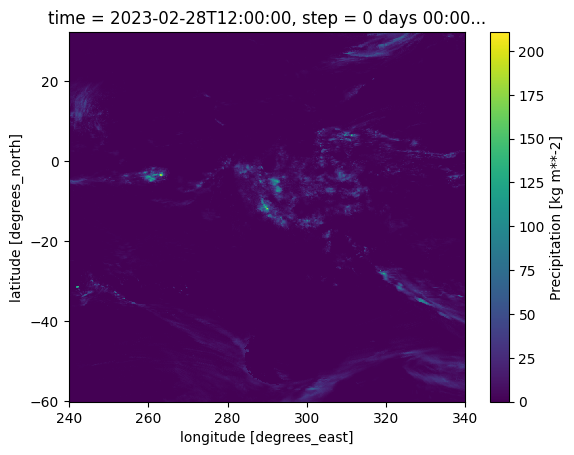

In [96]:
inpe = INPEHTTPFileSystem(Urls.MERGE)
rain = inpe.get_file('20230228')
path = rain.download('../tests/data')
ds = xr.open_dataset(path, engine='cfgrib')

ds['prec'].plot()

In [97]:
rain.info

{'Server': 'Apache',
 'Last-Modified': datetime.datetime(2023, 2, 28, 13, 20, 23),
 'ETag': '"6e0fb-5f5c4f8f8bfc0"',
 'Accept-Ranges': 'bytes',
 'Content-Length': '450811',
 'Access-Control-Allow-Origin': '*',
 'Keep-Alive': 'timeout=5, max=100',
 'Connection': 'Keep-Alive',
 'Request_time': datetime.datetime(2023, 2, 28, 16, 4, 55),
 'model': 'MERGE',
 'provider': 'CPTEC',
 'date': datetime.datetime(2023, 2, 28, 0, 0),
 'ext': 'grib2'}

In [102]:
from raindownloader.http_utils import OSFile
file = NamedOSFile(path, MERGEFile.parse_name)
file.info

{'atime': datetime.datetime(2023, 2, 28, 13, 20, 23),
 'ctime': datetime.datetime(2023, 2, 28, 16, 4, 58, 694353),
 'mtime': datetime.datetime(2023, 2, 28, 13, 20, 23),
 'birthtime': datetime.datetime(2023, 2, 28, 13, 20, 23),
 'size': 450811,
 'model': 'MERGE',
 'provider': 'CPTEC',
 'date': datetime.datetime(2023, 2, 28, 0, 0),
 'ext': 'grib2'}

In [100]:
path.name

'MERGE_CPTEC_20230228.grib2'

In [103]:
import geopandas

In [106]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [109]:
geopandas.datasets.get_path('naturalearth_lowres')

'/Users/cordmaur/miniconda3/envs/geopandas38/lib/python3.8/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'